# Plant Disease Prediction

In [1]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/PlantDiseases"

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/My Drive/PlantDiseases/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 31618 files belonging to 17 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/My Drive/PlantDiseases/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7897 files belonging to 17 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [5]:
model = tf.keras.models.Sequential()

### Building Convolution Layer

In [6]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(tf.keras.layers.Dropout(0.25))

In [12]:
model.add(tf.keras.layers.Flatten())

In [13]:
model.add(tf.keras.layers.Dense(units=1000,activation='relu'))

In [14]:
model.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
model.add(tf.keras.layers.Dense(units=17,activation='softmax'))

### Compiling and Training Phase

In [16]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [18]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
989/989 [==============================] - 3662s 4s/step - loss: 1.0293 - accuracy: 0.6598 - val_loss: 0.5619 - val_accuracy: 0.8117
Epoch 2/10
989/989 [==============================] - 2852s 3s/step - loss: 0.3691 - accuracy: 0.8746 - val_loss: 0.2982 - val_accuracy: 0.8989
Epoch 3/10
989/989 [==============================] - 2845s 3s/step - loss: 0.2290 - accuracy: 0.9240 - val_loss: 0.2807 - val_accuracy: 0.9039
Epoch 4/10
989/989 [==============================] - 2813s 3s/step - loss: 0.1585 - accuracy: 0.9473 - val_loss: 0.2208 - val_accuracy: 0.9248
Epoch 5/10
989/989 [==============================] - 2809s 3s/step - loss: 0.1377 - accuracy: 0.9552 - val_loss: 0.1022 - val_accuracy: 0.9663
Epoch 6/10
989/989 [==============================] - 2821s 3s/step - loss: 0.0952 - accuracy: 0.9686 - val_loss: 0.0871 - val_accuracy: 0.9721
Epoch 7/10
989/989 [==============================] - 2790s 3s/step - loss: 0.0807 - accuracy: 0.9732 - val_loss: 0.1103 - val_accuracy:

## Evaluating Model

In [21]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

989/989 [==============================] - 723s 731ms/step - loss: 0.0249 - accuracy: 0.9917
Training accuracy: 0.9917135834693909


In [24]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

247/247 [==============================] - 188s 759ms/step - loss: 0.0680 - accuracy: 0.9799
Validation accuracy: 0.9798657894134521


### Saving Model

In [22]:
model.save('/content/drive/My Drive/PlantDiseases/Model/trained_plant_disease_model.keras')

In [23]:
model.save('/content/drive/My Drive/PlantDiseases/Model/trained_plant_disease_model.h5')

In [31]:
training_history.history #Return Dictionary of history

{'loss': [1.029278039932251,
  0.3690876364707947,
  0.22897402942180634,
  0.15851163864135742,
  0.1376645416021347,
  0.09524001181125641,
  0.08068029582500458,
  0.07441315799951553,
  0.05700604245066643,
  0.04894077032804489],
 'accuracy': [0.6598456501960754,
  0.8745651245117188,
  0.924030601978302,
  0.9473084807395935,
  0.955152153968811,
  0.9685938358306885,
  0.973179817199707,
  0.976089596748352,
  0.9812132120132446,
  0.9846290349960327],
 'val_loss': [0.5618963241577148,
  0.2981913685798645,
  0.28068315982818604,
  0.22079069912433624,
  0.10224422812461853,
  0.08709392696619034,
  0.11026581376791,
  0.09930355101823807,
  0.10510234534740448,
  0.06801294535398483],
 'val_accuracy': [0.8117006421089172,
  0.8989489674568176,
  0.9038875699043274,
  0.9247815608978271,
  0.9663163423538208,
  0.9721413254737854,
  0.9653033018112183,
  0.9684690237045288,
  0.9666962027549744,
  0.9798657894134521]}

In [32]:
#Recording History in json
import json
with open('/content/drive/My Drive/PlantDiseases/training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

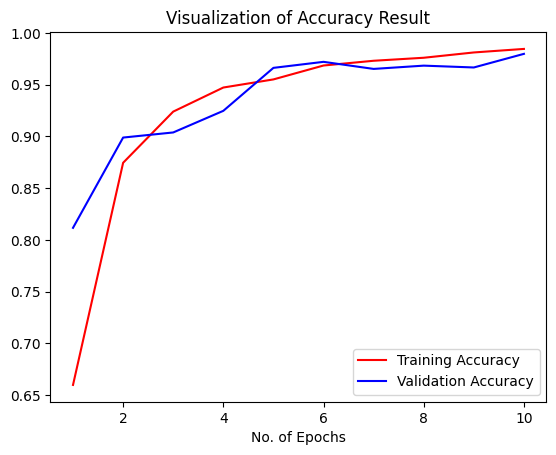

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [28]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/My Drive/PlantDiseases/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7897 files belonging to 17 classes.


In [30]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

7897/7897 [==============================] - 231s 29ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(7897,), dtype=int64, numpy=array([ 0,  0,  0, ..., 16, 16, 16])>

In [36]:
predicted_categories

<tf.Tensor: shape=(7897,), dtype=int64, numpy=array([ 0,  0,  0, ..., 16, 16, 16])>

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [38]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                            precision    recall  f1-score   support

                         Apple___Black_rot       0.98      1.00      0.99       497
                  Apple___Cedar_apple_rust       0.99      1.00      0.99       440
                           Apple___healthy       0.98      0.98      0.98       502
               Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
       Corn_(maize)___Northern_Leaf_Blight       0.99      1.00      0.99       477
                    Corn_(maize)___healthy       1.00      1.00      1.00       465
                         Grape___Black_rot       0.98      1.00      0.99       472
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      0.98      0.99       430
                           Grape___healthy       1.00      1.00      1.00       423
                   Tomato___Bacterial_spot       0.98      0.99      0.99       425
                     Tomato___Early_blight       0.96      0.93      0.94  

### Confusion Matrix Visualization

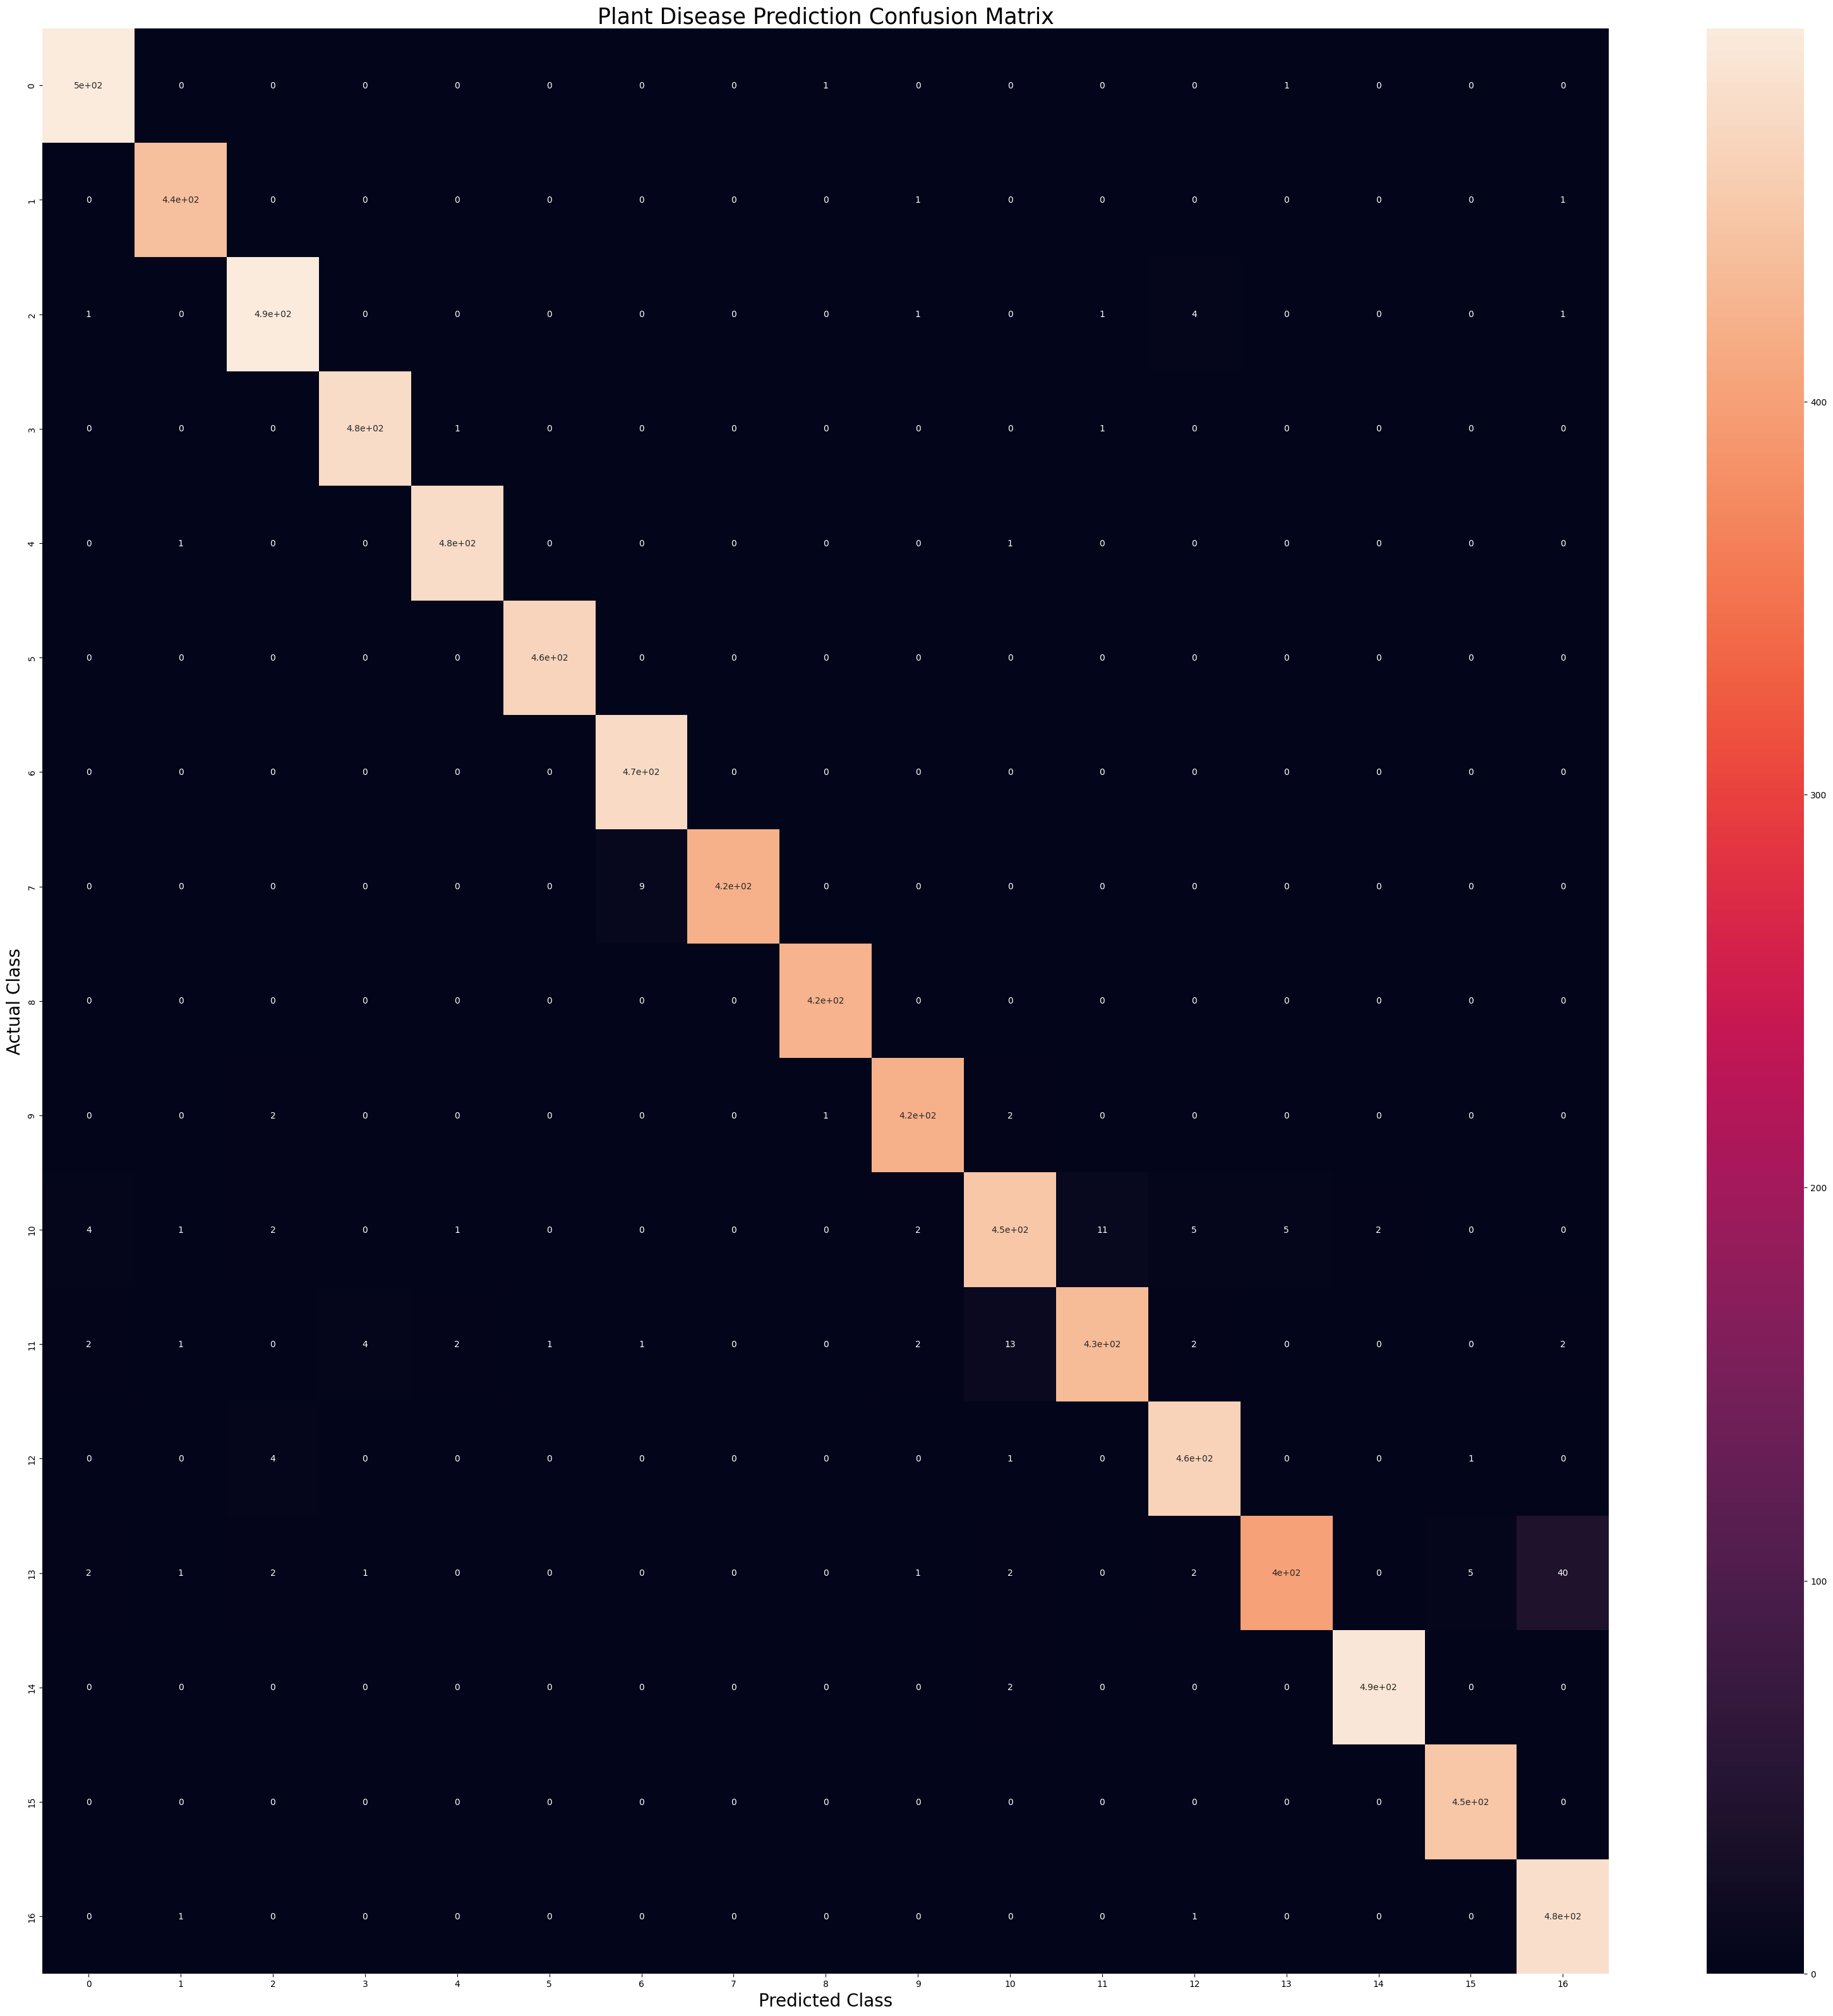

In [39]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()